In [212]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import calendar

In [213]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [214]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [215]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

### EU Average of Alkalinity

In [216]:
data_baseline = data_baseline.where(data_baseline != 0, drop=False)
data_oae = data_oae.where(data_oae != 0, drop=False)

In [217]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [218]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [219]:
data_baseline_plot = data_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [220]:
data_baseline_plot = data_baseline_plot.to_dataset(name='ALK')
data_oae_plot = data_oae_plot.to_dataset(name='ALK')

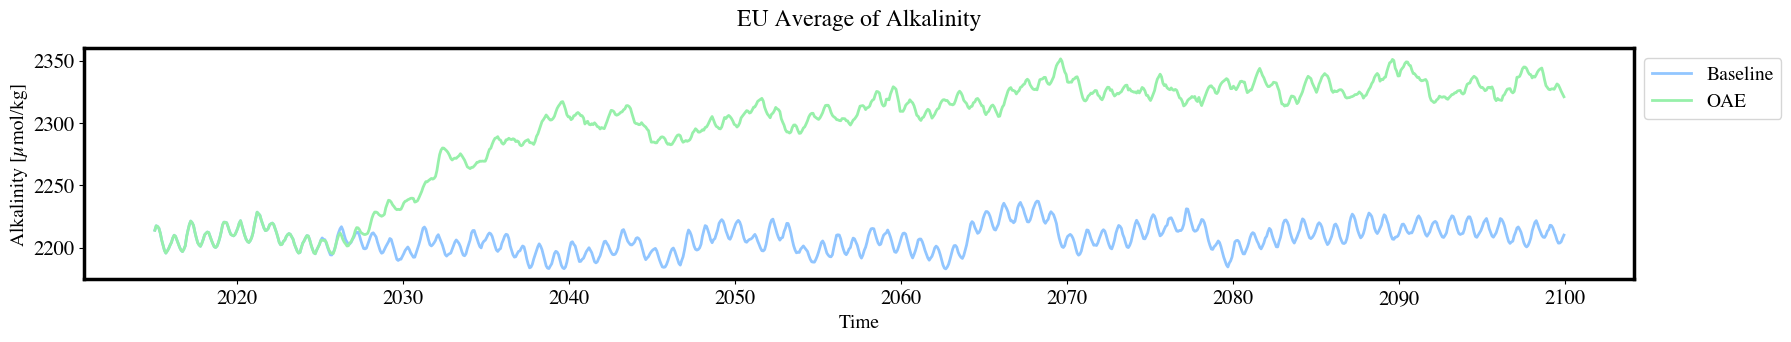

In [221]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of Alkalinity', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [222]:
sliced_frame_baseline_plot = sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [223]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

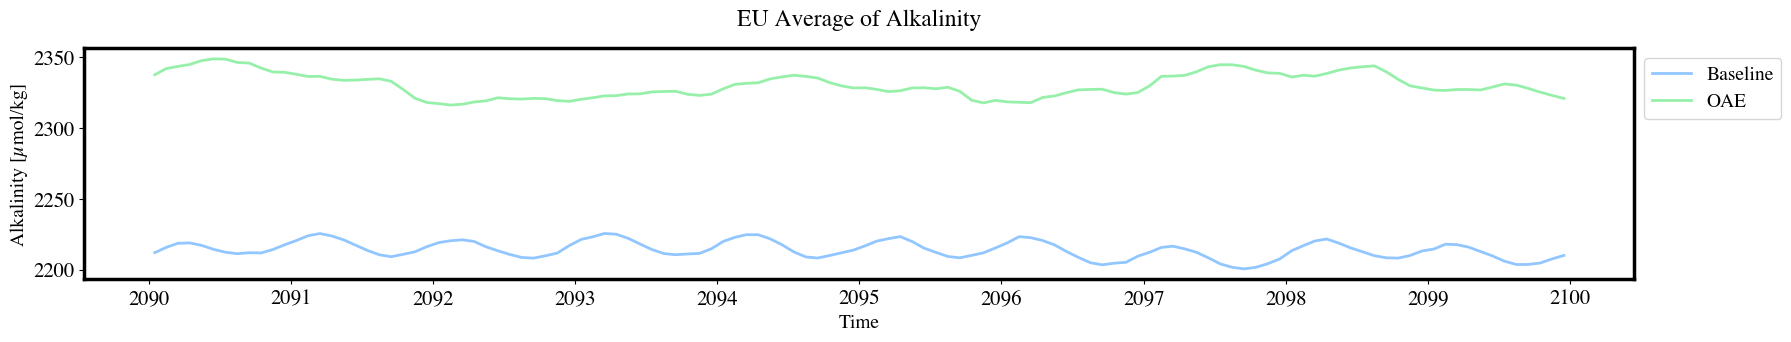

In [224]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of Alkalinity', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of Alkalinity

In [225]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_baseline = data_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [226]:
# resample quarterly, starting on December 1 ('QS-DEC')

alk_season_mean_all_years_baseline = alk_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_baseline = alk_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [227]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_oae = data_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [228]:
alk_season_mean_all_years_oae = alk_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_oae = alk_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

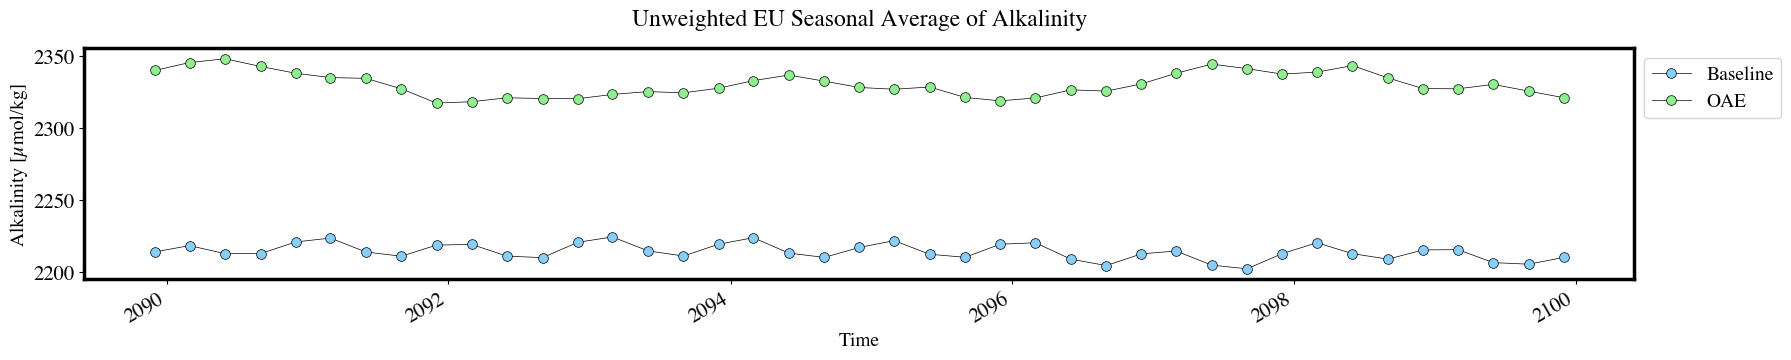

In [229]:
f, ax = plt.subplots(figsize=(20, 3))

alk_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity

In [230]:
# calculate month length in days
# (resample dataset by season) / (number of days in each season)
# average over lon, lat and depth

In [231]:
month_length_baseline = alk_baseline.time_counter.dt.days_in_month
alk_weighted_mean_baseline = ((alk_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_baseline = alk_weighted_mean_baseline.where(alk_weighted_mean_baseline)
alk_weighted_season_baseline = alk_weighted_mean_baseline.mean(["y", "x", "deptht"])

In [232]:
month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_mean_oae = ((alk_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_oae = alk_weighted_mean_oae.where(alk_weighted_mean_oae)
alk_weighted_season_oae = alk_weighted_mean_oae.mean(["y", "x", "deptht"])

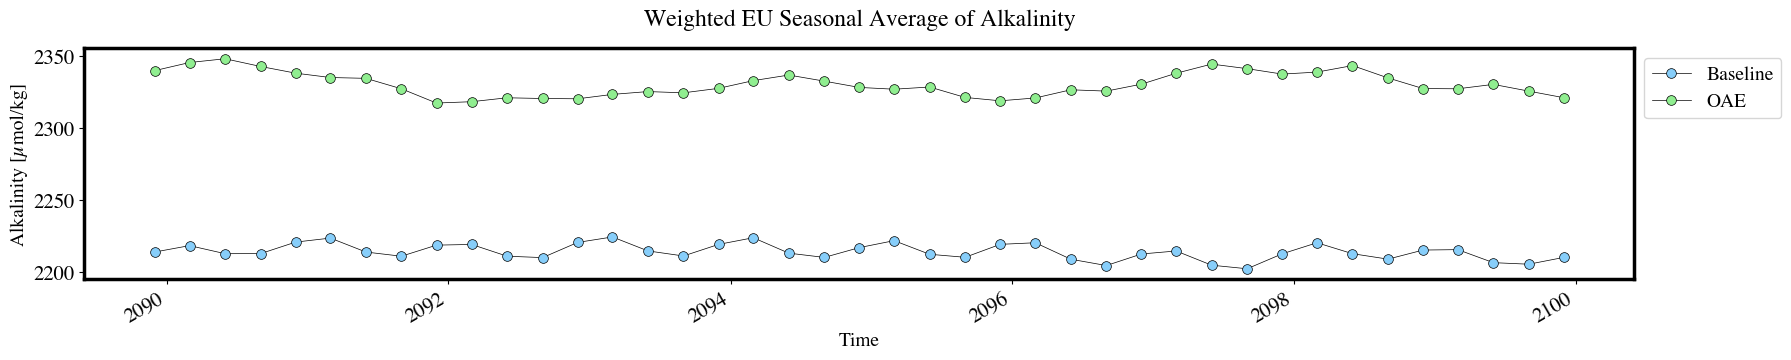

In [233]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
alk_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

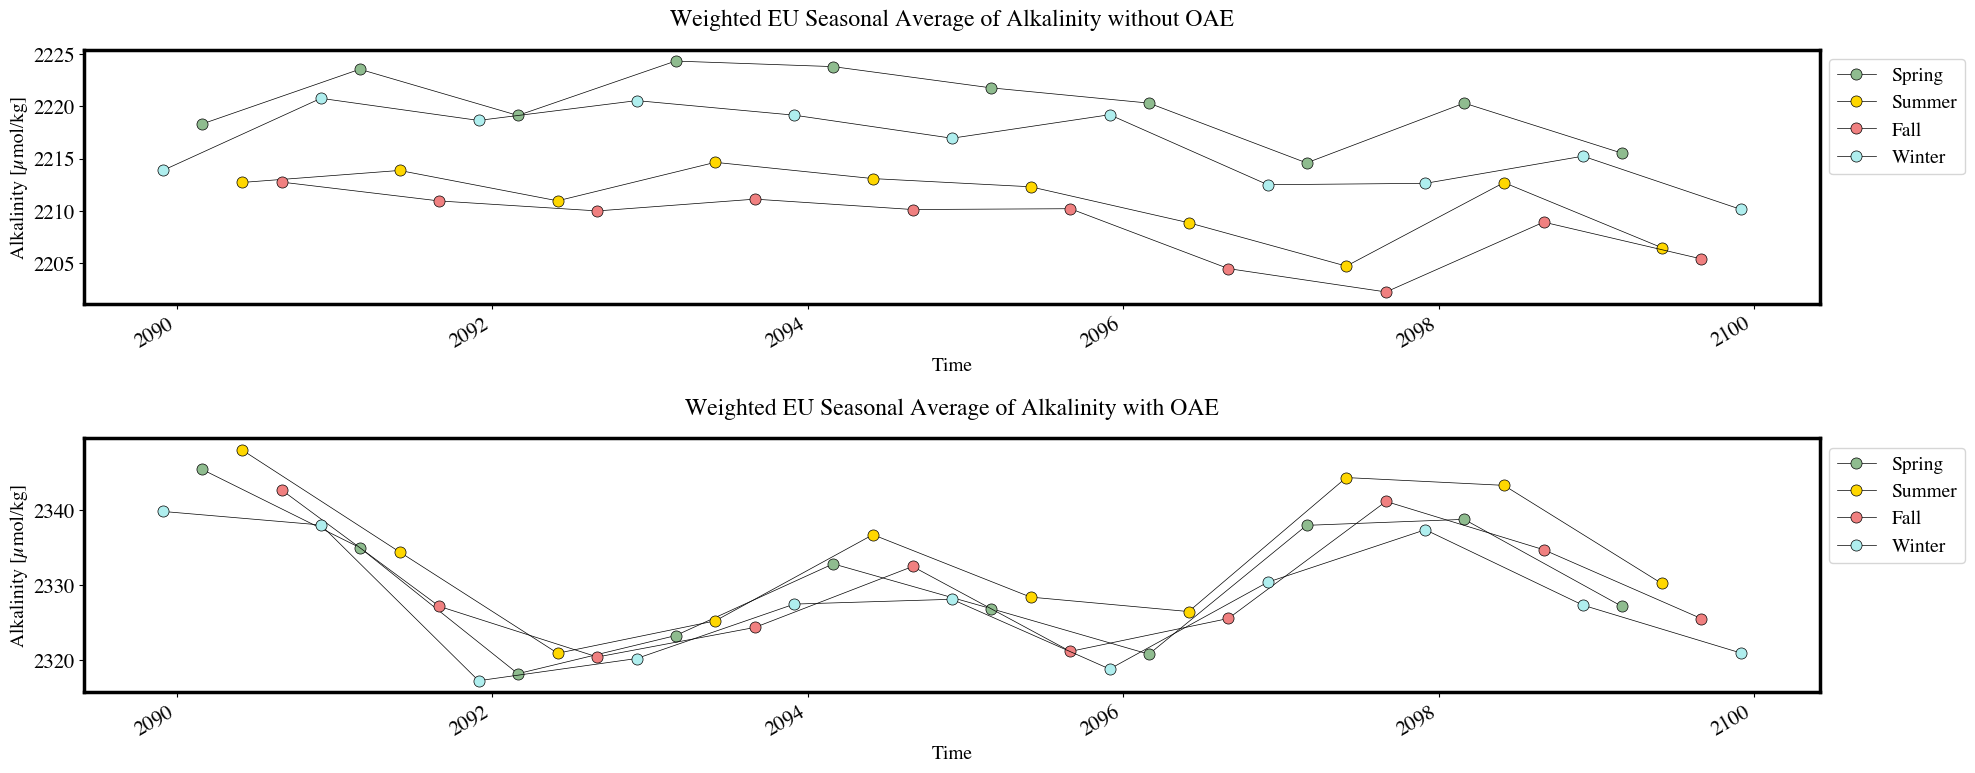

In [234]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in alk_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

for month, arr in alk_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of Alkalinity without OAE (seasons displayed)

In [235]:
alk_weighted_baseline = alk_weighted_season_baseline.to_dataframe('alk')

In [236]:
# take only month for each value

alk_weighted_baseline['Month'] = pd.DatetimeIndex(alk_weighted_baseline.index).month

In [237]:
# assign each month to corresponding starting season 

conditions = [
    (alk_weighted_baseline['Month'] == 3),
    (alk_weighted_baseline['Month'] == 6),
    (alk_weighted_baseline['Month'] == 9),
    (alk_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_baseline['Month'] = np.select(conditions, values)

In [238]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

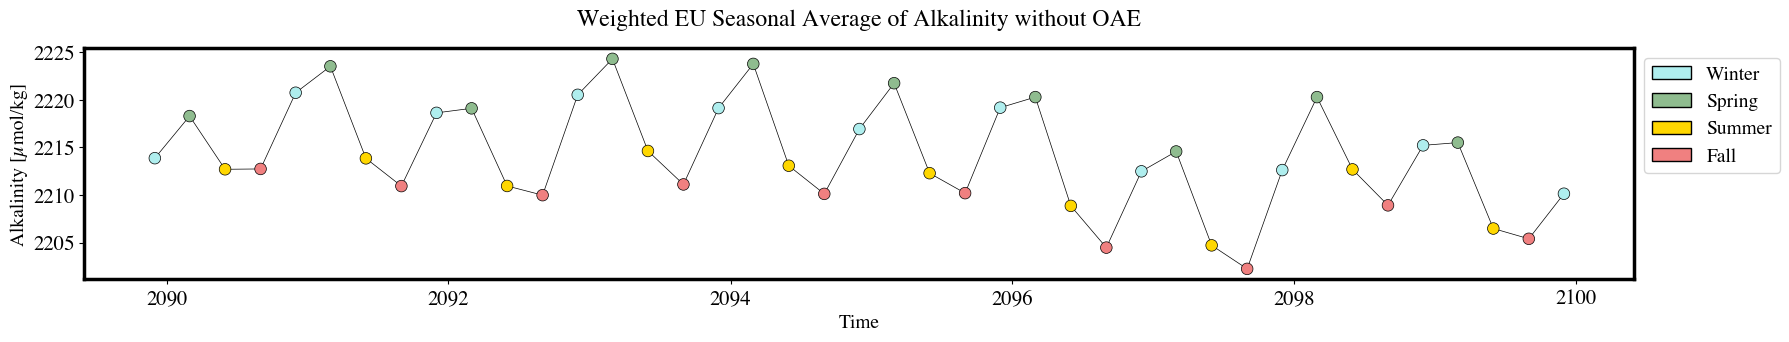

In [239]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.alk, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity with OAE (seasons displayed)

In [240]:
alk_weighted_oae = alk_weighted_season_oae.to_dataframe('alk')
alk_weighted_oae['Month'] = pd.DatetimeIndex(alk_weighted_oae.index).month

In [241]:
conditions = [
    (alk_weighted_oae['Month'] == 3),
    (alk_weighted_oae['Month'] == 6),
    (alk_weighted_oae['Month'] == 9),
    (alk_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_oae['Month'] = np.select(conditions, values)

In [242]:
colors = dict(zip(alk_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

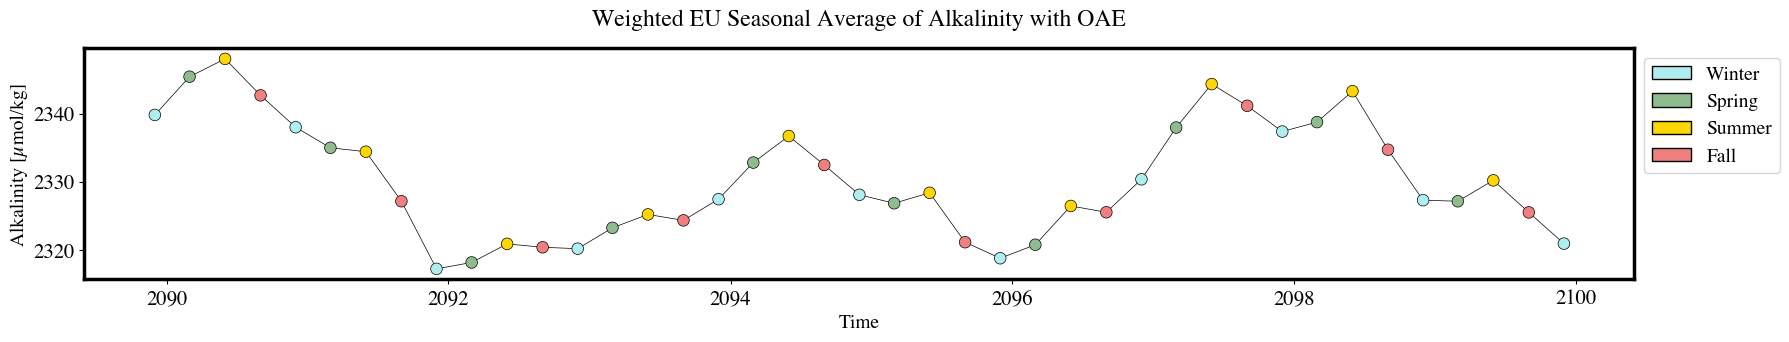

In [243]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.alk, color=alk_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

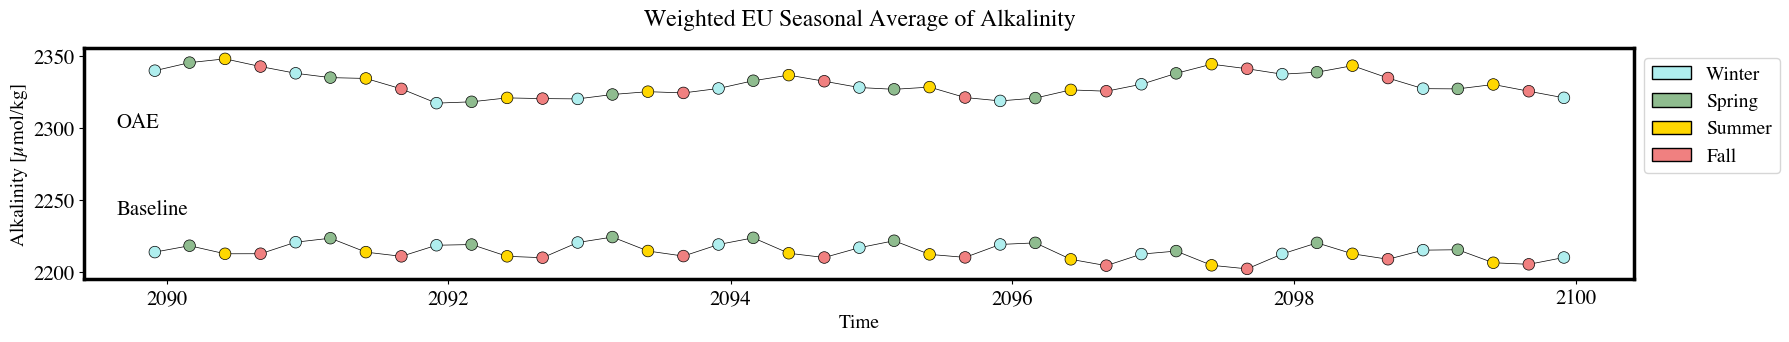

In [244]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2240, s='Baseline')
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.alk, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2300, s='OAE')
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.alk, color=alk_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

pass

### EU Monthly Averaged Alkalinity for the last 10 years

In [245]:
mean_baseline = (sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ALK.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [246]:
mean_oae = (sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).ALK.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

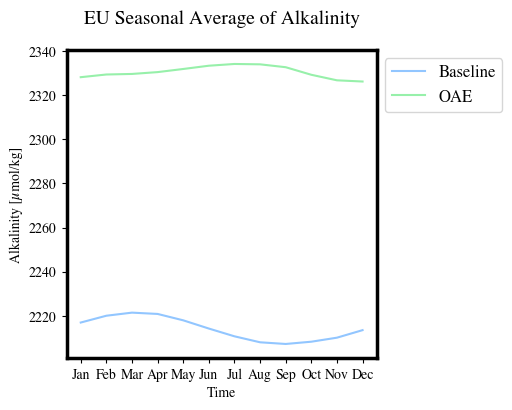

In [247]:
plt.figure(figsize=(4,4))
plt.plot(mean_baseline.ALK, label='Baseline')
plt.plot(mean_oae.ALK, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Times")
plt.yticks(fontsize=10, fontname="Times")
plt.title('EU Seasonal Average of Alkalinity', fontname="Times", fontsize=14, y=1.06)
plt.show()

### Map of EU Seasonal Average of Alkalinity without OAE

In [248]:
sliced_frame_baseline = sliced_frame_baseline.ALK.mean(dim=('deptht'))

In [249]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [250]:
ds_weighted_baseline = ds_weighted_baseline.where(ds_weighted_baseline)

In [251]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [252]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='alk')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='alk')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='alk')

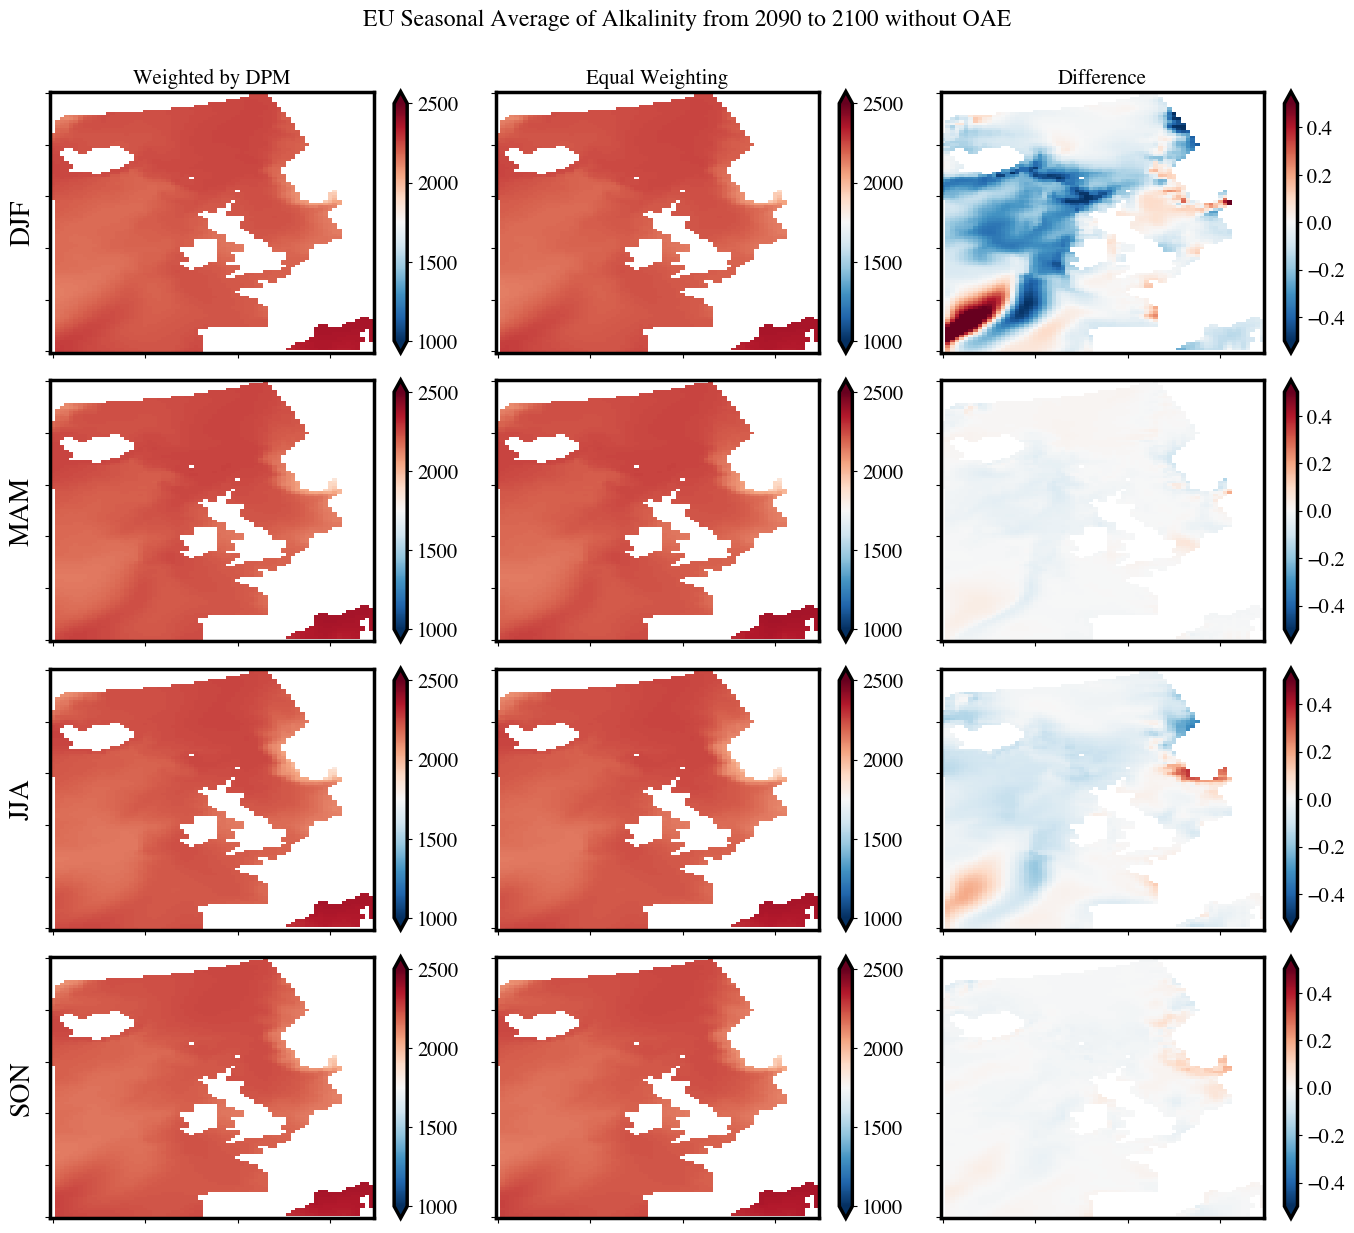

In [253]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of Alkalinity with OAE

In [254]:
sliced_frame_oae = sliced_frame_oae.ALK.mean(dim=('deptht'))

In [255]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [256]:
ds_weighted_oae = ds_weighted_oae.where(ds_weighted_oae)

In [257]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [258]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='alk')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='alk')
ds_diff_oae = ds_diff_oae.to_dataset(name='alk')

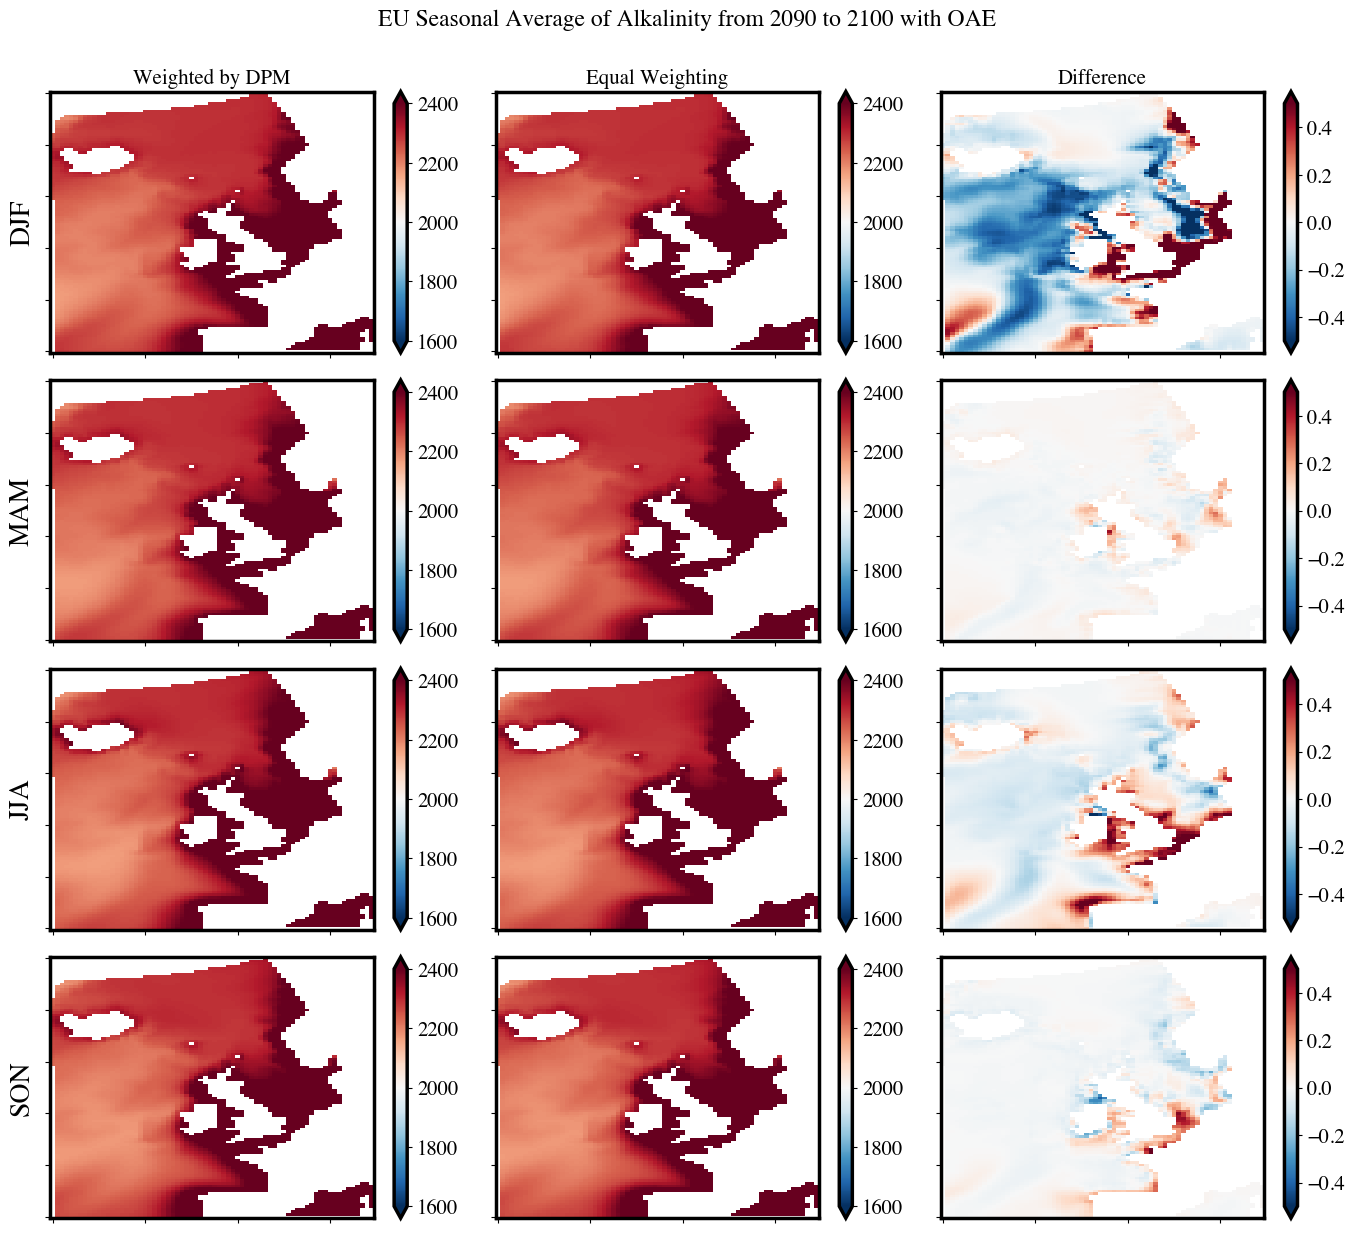

In [259]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1600,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1600,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["alk"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of Alkalinity

In [260]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

alk_baseline_month = data_baseline["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_baseline = alk_baseline_month.mean(["y", "x", "deptht"])

In [261]:
alk_oae_month = data_oae["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_oae = alk_oae_month.mean(["y", "x", "deptht"])

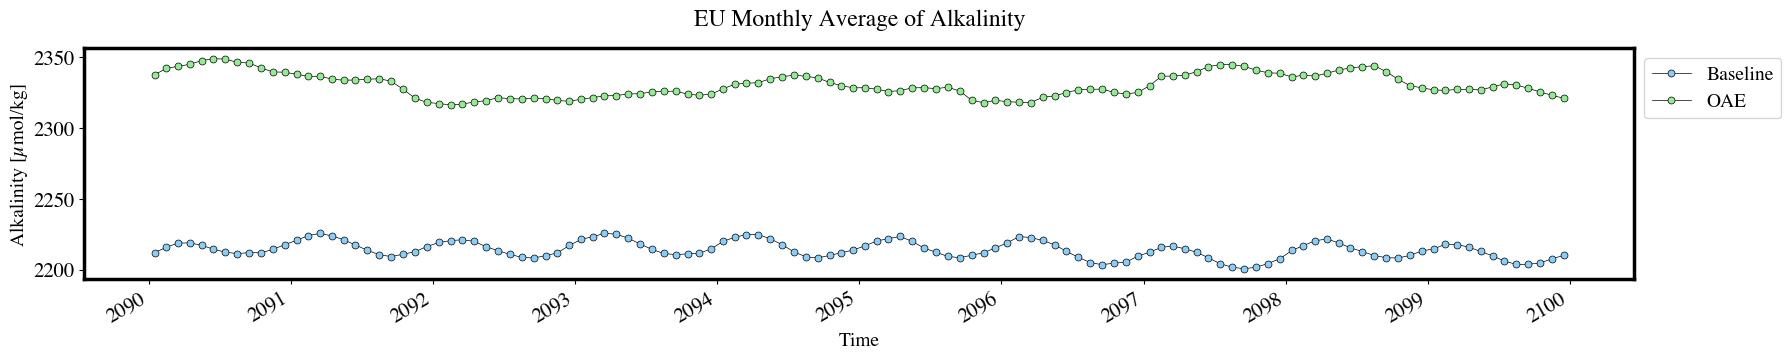

In [262]:
f, ax = plt.subplots(figsize=(20, 3))

alk_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of Alkalinity", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of Alkalinity without OAE (months displayed)

In [263]:
alk_baseline_monthly = alk_monthly_mean_baseline.to_dataframe('alk')
alk_baseline_monthly['Month'] = pd.DatetimeIndex(alk_baseline_monthly.index).month

In [264]:
conditions = [
    (alk_baseline_monthly['Month'] == 1),
    (alk_baseline_monthly['Month'] == 2),
    (alk_baseline_monthly['Month'] == 3),
    (alk_baseline_monthly['Month'] == 4),
    (alk_baseline_monthly['Month'] == 5),
    (alk_baseline_monthly['Month'] == 6),
    (alk_baseline_monthly['Month'] == 7),
    (alk_baseline_monthly['Month'] == 8),
    (alk_baseline_monthly['Month'] == 9),
    (alk_baseline_monthly['Month'] == 10),
    (alk_baseline_monthly['Month'] == 11),
    (alk_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_baseline_monthly['Month'] = np.select(conditions, values)

In [265]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

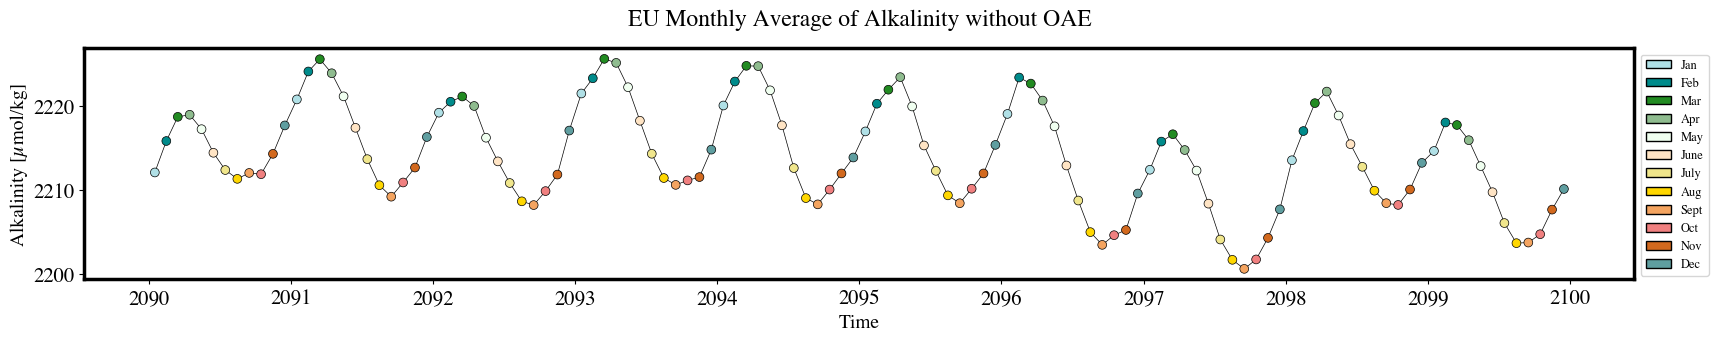

In [266]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.alk, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of Alkalinity with OAE (months displayed)

In [267]:
alk_oae_monthly = alk_monthly_mean_oae.to_dataframe('alk')
alk_oae_monthly['Month'] = pd.DatetimeIndex(alk_oae_monthly.index).month

In [268]:
conditions = [
    (alk_oae_monthly['Month'] == 1),
    (alk_oae_monthly['Month'] == 2),
    (alk_oae_monthly['Month'] == 3),
    (alk_oae_monthly['Month'] == 4),
    (alk_oae_monthly['Month'] == 5),
    (alk_oae_monthly['Month'] == 6),
    (alk_oae_monthly['Month'] == 7),
    (alk_oae_monthly['Month'] == 8),
    (alk_oae_monthly['Month'] == 9),
    (alk_oae_monthly['Month'] == 10),
    (alk_oae_monthly['Month'] == 11),
    (alk_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_oae_monthly['Month'] = np.select(conditions, values)

In [269]:
colors = dict(zip(alk_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

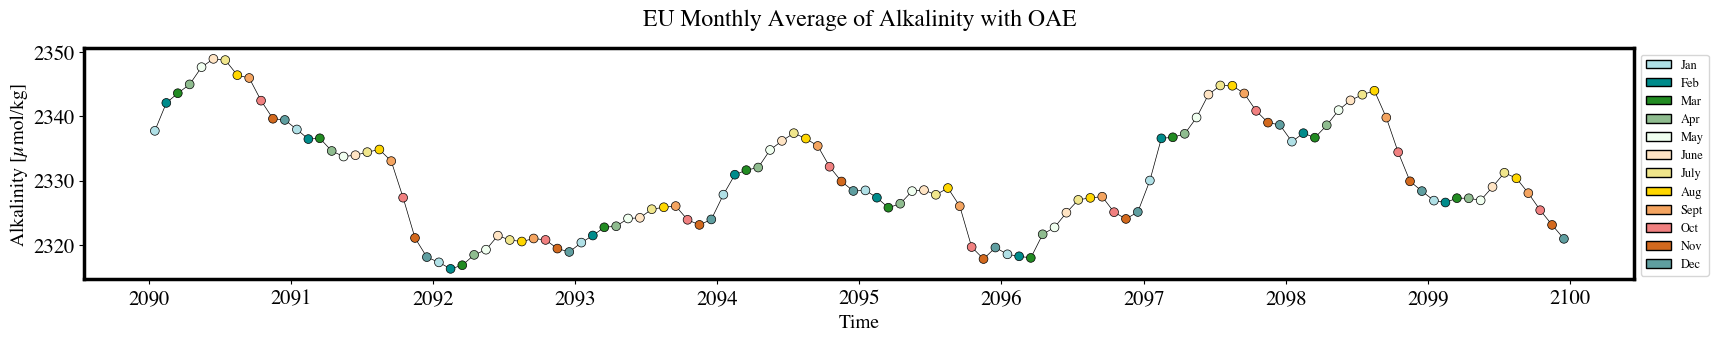

In [270]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.alk, color=alk_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of Alkalinity (months displayed)

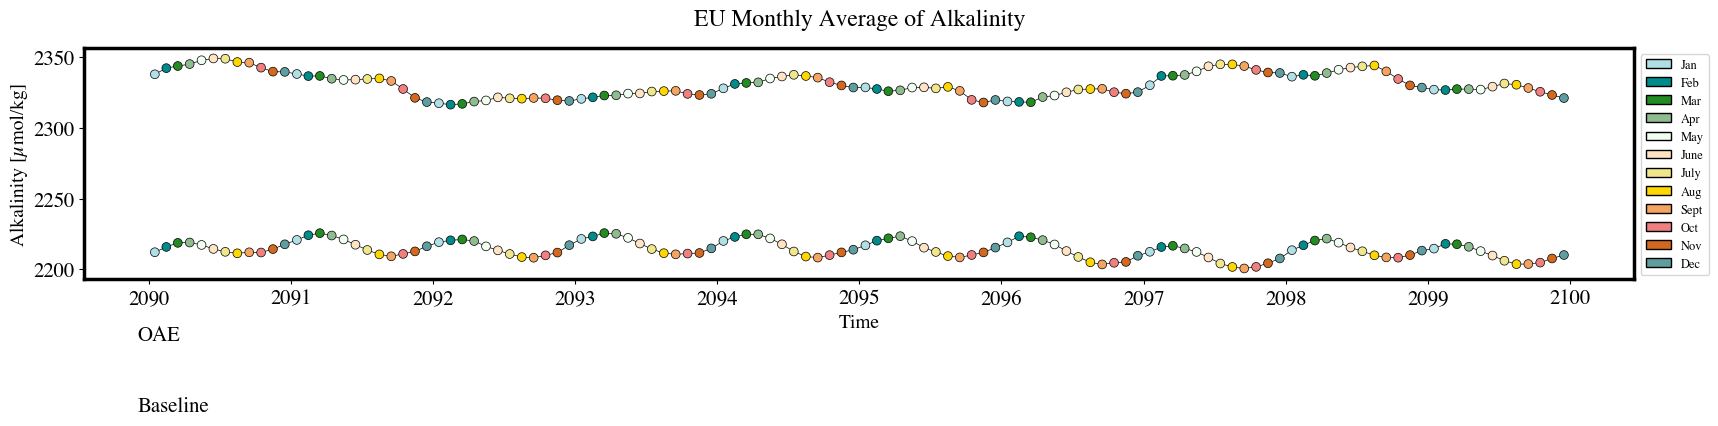

In [271]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.alk, '-', label='Baseline', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2100, s='Baseline')
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.alk, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.alk, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2150, s='OAE')
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.alk, color=alk_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity", fontsize=17, y=1.06)

pass

### Δ Alkalinity between Baseline and OAE

In [272]:
delta_alk = alk_oae_monthly.alk - alk_baseline_monthly.alk

In [273]:
delta_alk = delta_alk.to_xarray()

In [274]:
delta_alk = delta_alk.to_dataframe('alk')
delta_alk['Month'] = pd.DatetimeIndex(delta_alk.index).month

In [275]:
conditions = [
    (delta_alk['Month'] == 1),
    (delta_alk['Month'] == 2),
    (delta_alk['Month'] == 3),
    (delta_alk['Month'] == 4),
    (delta_alk['Month'] == 5),
    (delta_alk['Month'] == 6),
    (delta_alk['Month'] == 7),
    (delta_alk['Month'] == 8),
    (delta_alk['Month'] == 9),
    (delta_alk['Month'] == 10),
    (delta_alk['Month'] == 11),
    (delta_alk['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_alk['Month'] = np.select(conditions, values)

In [276]:
colors = dict(zip(delta_alk.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

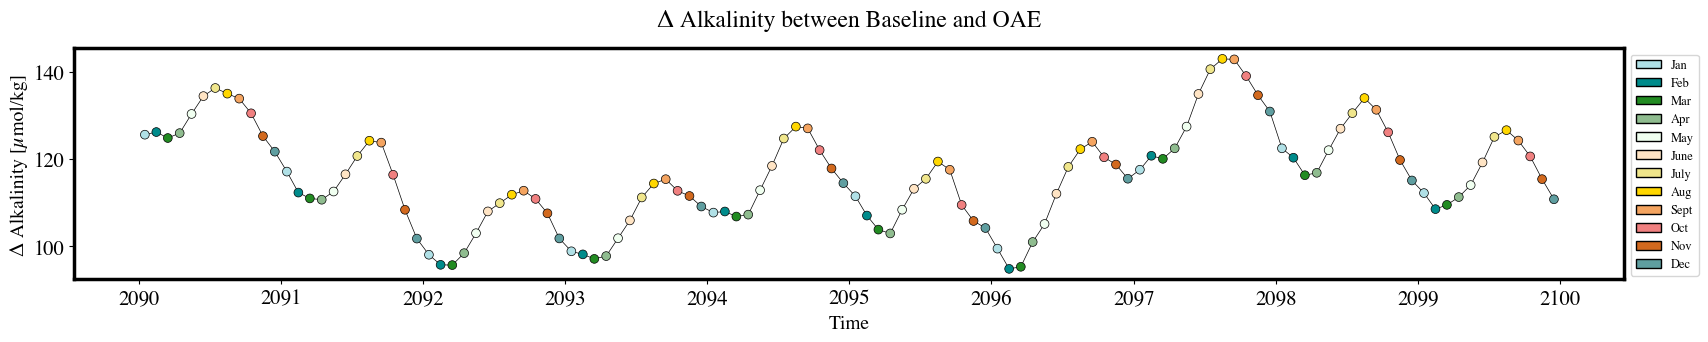

In [277]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_alk.index, delta_alk.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk.index, delta_alk.alk, color=delta_alk.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity [µmol/kg]', fontsize=14)
ax.set_title("Δ Alkalinity between Baseline and OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Averaged monthly cycle of Δ Alkalinity

In [278]:
delta_alk_mean = delta_alk.groupby(delta_alk.index.month).alk.mean()
delta_alk_mean = delta_alk_mean.reset_index()
delta_alk_mean['time_counter'] = delta_alk_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [279]:
colors = dict(zip(delta_alk_mean.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

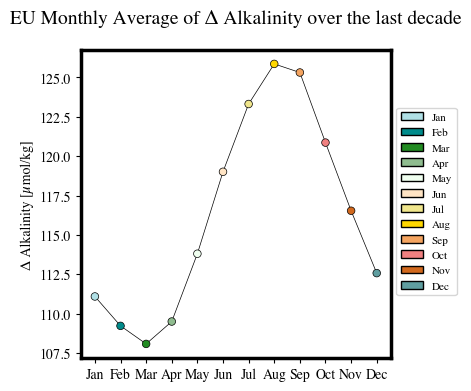

In [280]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_alk_mean.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk_mean.time_counter, delta_alk_mean.alk, color=delta_alk_mean.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
ax.set_ylabel('Δ Alkalinity [µmol/kg]', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("EU Monthly Average of Δ Alkalinity over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### EU Monthly Average of Δ Alkalinity (with annual average)

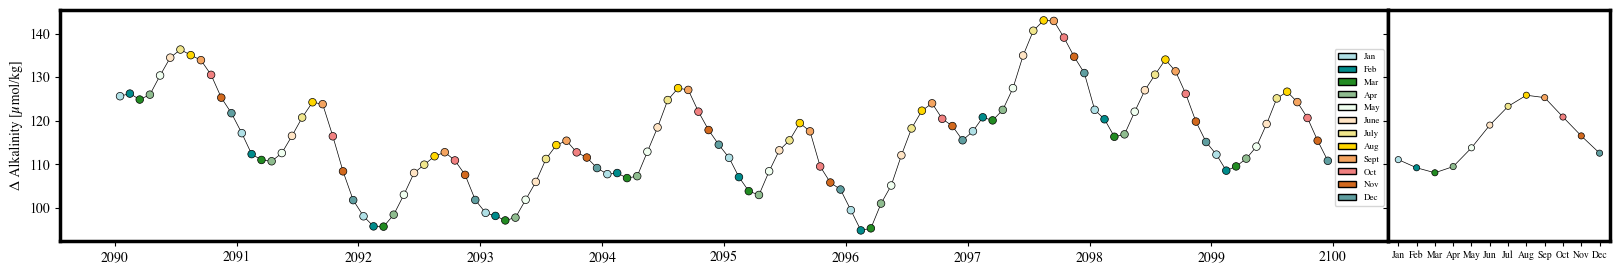

In [281]:
colors = dict(zip(delta_alk.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors2 = dict(zip(delta_alk_mean.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))


f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [6, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(delta_alk.index, delta_alk.alk, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.scatter(delta_alk.index, delta_alk.alk, color=delta_alk.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=10)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 0.85), loc='best', fontsize=6.5)
ax.yaxis.get_offset_text().set_fontsize(10)
ax.set_ylabel('Δ Alkalinity [µmol/kg]', fontsize=10)

ax2.plot(delta_alk_mean.alk, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_alk_mean.time_counter, delta_alk_mean.alk, color=delta_alk_mean.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=20)

ax2.tick_params(axis='x', which='major', labelsize=7)

#plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/EUAlk_change_monthly_mean.png')

pass

### Averaged monthly cycle of Alkalinity

In [282]:
mean_baseline = mean_baseline.reset_index()
mean_oae = mean_oae.reset_index()

In [283]:
colors = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [284]:
colors = dict(zip(mean_oae.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

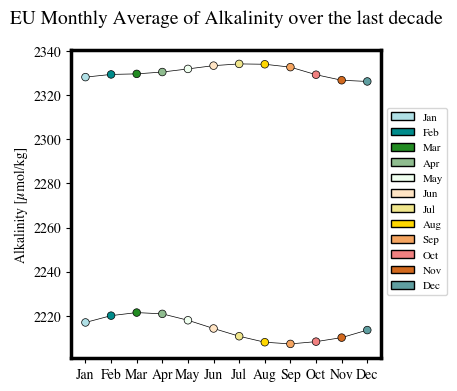

In [285]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.ALK, color=mean_baseline.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.ALK, color=mean_oae.time_counter.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_title("EU Monthly Average of Alkalinity over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### EU Monthly Average of Alkalinity (with annual average)

In [286]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

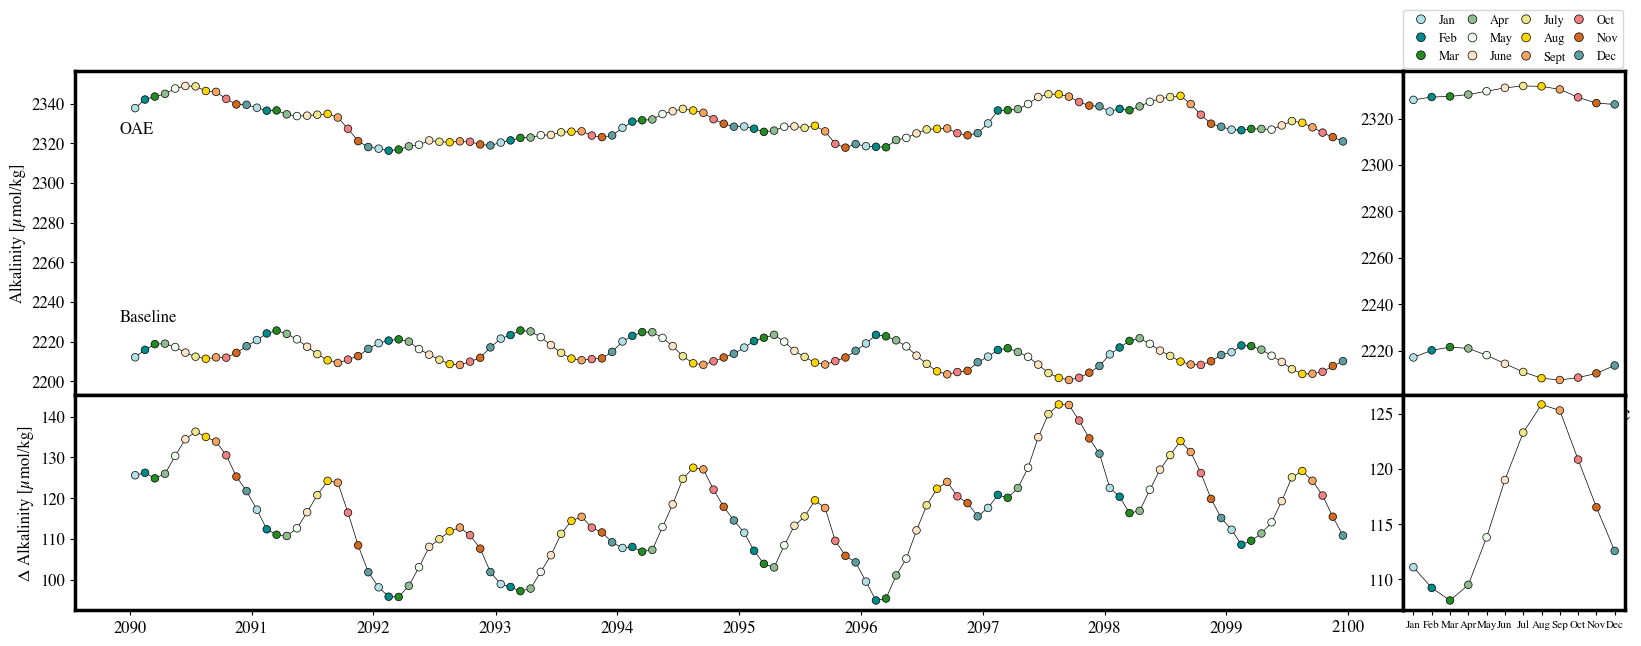

In [287]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors2 = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors3 = dict(zip(mean_oae.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey=False) 

plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.alk, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.text(43800, 2230, s='Baseline', fontsize=12)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.alk, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.alk, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2325, s='OAE', fontsize=12)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.alk, color=alk_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.ALK, color=mean_baseline.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.ALK, color=mean_oae.time_counter.map(lambda x: colors3[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='y', which='major', labelsize=12)
yticks = ax2.yaxis.get_major_ticks()
yticks[-2].label1.set_visible(False)

colors = dict(zip(delta_alk.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors2 = dict(zip(delta_alk_mean.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))


ax3.plot_date(delta_alk.index, delta_alk.alk, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_alk.index, delta_alk.alk, color=delta_alk.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Δ Alkalinity [µmol/kg]', fontsize=12)

ax4.plot(delta_alk_mean.alk, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_alk_mean.time_counter, delta_alk_mean.alk, color=delta_alk_mean.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=30)

ax4.tick_params(axis='x', which='major', labelsize=8)
ax4.tick_params(axis='y', which='major', labelsize=12)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/EUAlk_monthly_mean.png')

In [288]:
# add amplitude values to created csv table

In [289]:
summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Summary_amplitude.csv', header=[0,1], index_col=0)

In [290]:
summary_amplitude.loc['Alkalinity', ('EU Average','With OAE')] = round(mean_oae.ALK.max() - mean_oae.ALK.min())

In [291]:
summary_amplitude.loc['Alkalinity', ('EU Average','Without OAE')] = round(mean_baseline.ALK.max() - mean_baseline.ALK.min())

In [292]:
summary_amplitude.to_csv('../Summary_amplitude.csv')

In [293]:
print(summary_amplitude.style.to_latex())

\begin{tabular}{lrrrr}
{} & \multicolumn{2}{r}{EU Average} & \multicolumn{2}{r}{Location Point} \\
{} & {Without OAE} & {With OAE} & {Without OAE} & {With OAE} \\
{variables} & {} & {} & {} & {} \\
Alkalinity & 14.000000 & 8.000000 & 32.000000 & 214.000000 \\
CO2 flux & 2.220000 & 3.630000 & 8.030000 & 16.300000 \\
fCO2 & 27.000000 & 18.000000 & nan & nan \\
DIC & nan & nan & nan & nan \\
pH & nan & nan & nan & nan \\
\end{tabular}



### Alkalinity over Depth

In [294]:
data_baseline_depth = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [295]:
data_oae_depth = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [296]:
data_baseline_depth = data_baseline_depth.where(data_baseline_depth != 0, drop=False)
data_oae_depth = data_oae_depth.where(data_oae_depth != 0, drop=False)

In [297]:
depth_baseline_frame = data_baseline_depth.sel(time_counter=slice('2090', '2100'))
depth_oae_frame = data_oae_depth.sel(time_counter=slice('2090', '2100'))

In [298]:
depth_baseline_frame = depth_baseline_frame.ALK.mean(dim=('y', 'x', 'time_counter'))
depth_oae_frame = depth_oae_frame.ALK.mean(dim=('y', 'x', 'time_counter'))

In [299]:
depth_baseline_frame = depth_baseline_frame.to_dataset()
depth_oae_frame = depth_oae_frame.to_dataset()

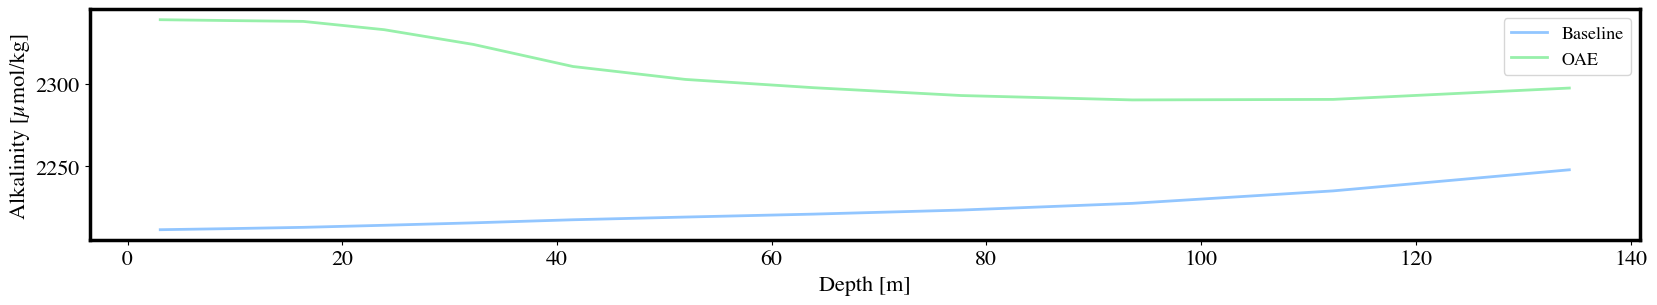

In [300]:
plt.figure(figsize=(20, 3))
plt.plot(depth_baseline_frame.deptht, depth_baseline_frame.ALK, linewidth=2, label = 'Baseline')
plt.plot(depth_oae_frame.deptht, depth_oae_frame.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Depth [m]", fontsize=16)
plt.ylabel("Alkalinity [µmol/kg]", fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=16)
#plt.title('EU Average of Alkalinity', fontsize=17, y=1.06)

pass

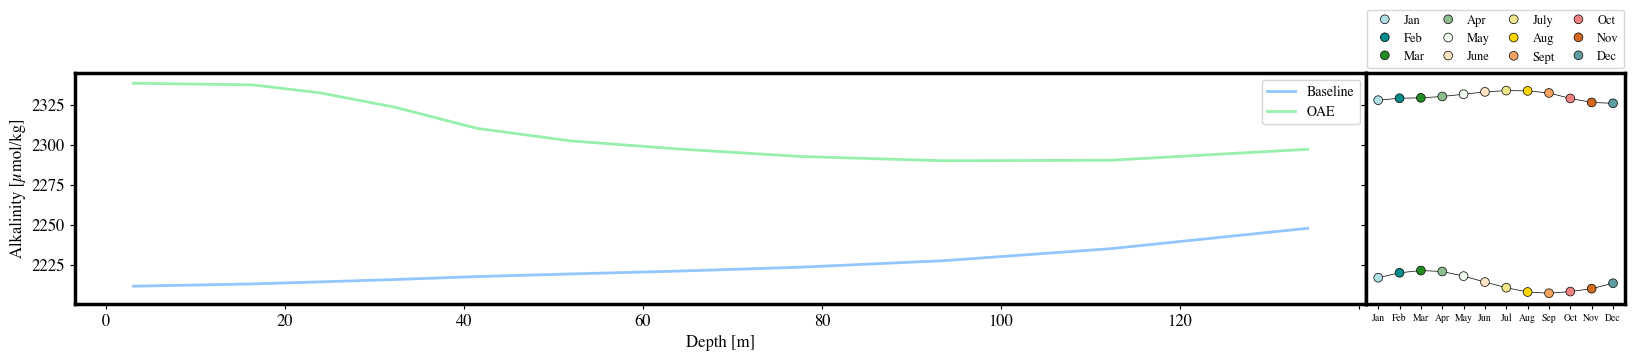

In [301]:
colors2 = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

colors3 = dict(zip(mean_oae.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))


f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [5, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot(depth_baseline_frame.deptht, depth_baseline_frame.ALK, linewidth=2, label = 'Baseline')
ax.plot(depth_oae_frame.deptht, depth_oae_frame.ALK, linewidth=2, label = 'OAE')

xticks = ax.xaxis.get_major_ticks()
xticks[-2].label1.set_visible(False)

ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel("Depth [m]", fontsize=12)
ax.set_ylabel("Alkalinity [µmol/kg]", fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors.items()]
ax2.legend(handles = legend, bbox_to_anchor=(1.02, 1.3), loc='best', columnspacing=0.9, handletextpad=0.5, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.ALK, color=mean_baseline.time_counter.map(lambda x: colors2[x]), edgecolors='black',  linewidth=0.5, s=40)

ax2.plot(mean_oae.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.ALK, color=mean_oae.time_counter.map(lambda x: colors3[x]), edgecolors='black',  linewidth=0.5, s=40)

ax2.tick_params(axis='x', which='major', labelsize=7)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/EUAlk_depthprof.png')

In [302]:
header_mm = [np.array(['Without OAE','Without OAE', 'With OAE', 'With OAE']), 
np.array(['Max', 'Min', 'Max', 'Min',])] 
summary_maxmin = pd.DataFrame(index=['Alkalinity', 'CO2 flux', 'fCO2', 'DIC', 'pH'], columns = header_mm)
summary_maxmin.index.name = 'Variables'

In [303]:
summary_maxmin.loc['Alkalinity', ('Without OAE','Max')] = round(mean_baseline.ALK.max())
summary_maxmin.loc['Alkalinity', ('Without OAE','Min')] = round(mean_baseline.ALK.min())

In [304]:
summary_maxmin.loc['Alkalinity', ('With OAE','Max')] = round(mean_oae.ALK.max())
summary_maxmin.loc['Alkalinity', ('With OAE','Min')] = round(mean_oae.ALK.min())

In [305]:
summary_maxmin.to_csv('../Summary_minmax_eu.csv')